In [2]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
paciente = pd.read_csv('pacientes_final.csv')
paciente['data_hora_agendada'] = pd.to_datetime(consulta['data_hora_agendada'])
paciente['data_hora_inicio'] = pd.to_datetime(consulta['data_hora_inicio'])
paciente.head(5)

,id_paciente,idade,sexo,cidade,plano_saude,data_hora_agendada,data_hora_inicio
0,1,21,M,Manaus,Sim,2023-09-27 23:46:00,2023-09-28 00:16:00
1,2,15,M,Brasília,Sim,2023-09-04 09:05:00,2023-09-04 13:05:00
2,3,86,M,Salvador,Não,2023-02-04 02:43:00,2023-02-04 02:58:00
3,4,87,M,Manaus,Sim,2023-03-14 09:28:00,2023-03-14 13:28:00
4,5,56,M,Porto Alegre,Não,2023-10-22 16:54:00,2023-10-22 16:54:00


In [13]:
paciente['tempo_espera'] = paciente['data_hora_inicio'] - paciente['data_hora_agendada']
paciente['tempo_espera'] = pd.to_timedelta(paciente['tempo_espera']).dt.total_seconds() / 60

In [14]:
paciente.head(10)

,id_paciente,idade,sexo,cidade,plano_saude,data_hora_agendada,data_hora_inicio,tempo_espera
0,1,21,M,Manaus,Sim,2023-09-27 23:46:00,2023-09-28 00:16:00,30.0
1,2,15,M,Brasília,Sim,2023-09-04 09:05:00,2023-09-04 13:05:00,240.0
2,3,86,M,Salvador,Não,2023-02-04 02:43:00,2023-02-04 02:58:00,15.0
3,4,87,M,Manaus,Sim,2023-03-14 09:28:00,2023-03-14 13:28:00,240.0
4,5,56,M,Porto Alegre,Não,2023-10-22 16:54:00,2023-10-22 16:54:00,0.0
5,6,64,F,Brasília,Sim,2023-05-04 21:09:00,2023-05-04 21:39:00,30.0
6,7,70,M,Rio de Janeiro,Não,2023-02-03 18:25:00,2023-02-03 20:25:00,120.0
7,8,86,F,Brasília,Não,2023-10-21 20:47:00,2023-10-21 20:47:00,0.0
8,9,88,F,Brasília,Não,2023-01-29 16:33:00,2023-01-29 20:33:00,240.0
9,10,56,M,Porto Alegre,Não,2023-07-30 04:58:00,2023-07-30 05:13:00,15.0


In [3]:
consulta = pd.read_csv('consultas_final.csv')
consulta['data_hora_agendada'] = pd.to_datetime(consulta['data_hora_agendada'])
consulta['data_hora_inicio'] = pd.to_datetime(consulta['data_hora_inicio'])
consulta.head(5)

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status
0,1,82,15,4,Cardiologia,2023-09-27 23:46:00,2023-09-28 00:16:00,Realizada
1,2,18,95,14,Cardiologia,2023-09-04 09:05:00,2023-09-04 13:05:00,Realizada
2,3,55,5,4,Pediatria,2023-02-04 02:43:00,2023-02-04 02:58:00,Realizada
3,4,78,4,72,Ortopedia,2023-03-14 09:28:00,2023-03-14 13:28:00,Realizada
4,5,58,76,36,Pediatria,2023-10-22 16:54:00,2023-10-22 16:54:00,Cancelada


In [4]:
consulta['tempo_espera'] = consulta['data_hora_inicio'] - consulta['data_hora_agendada']
consulta['tempo_espera'] = pd.to_timedelta(consulta['tempo_espera']).dt.total_seconds() / 60

In [5]:
consulta.head(10)

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera
0,1,82,15,4,Cardiologia,2023-09-27 23:46:00,2023-09-28 00:16:00,Realizada,30.0
1,2,18,95,14,Cardiologia,2023-09-04 09:05:00,2023-09-04 13:05:00,Realizada,240.0
2,3,55,5,4,Pediatria,2023-02-04 02:43:00,2023-02-04 02:58:00,Realizada,15.0
3,4,78,4,72,Ortopedia,2023-03-14 09:28:00,2023-03-14 13:28:00,Realizada,240.0
4,5,58,76,36,Pediatria,2023-10-22 16:54:00,2023-10-22 16:54:00,Cancelada,0.0
5,6,21,90,55,Dermatologia,2023-05-04 21:09:00,2023-05-04 21:39:00,Realizada,30.0
6,7,98,44,14,Cardiologia,2023-02-03 18:25:00,2023-02-03 20:25:00,Realizada,120.0
7,8,45,78,34,Ortopedia,2023-10-21 20:47:00,2023-10-21 20:47:00,Cancelada,0.0
8,9,69,16,49,Ortopedia,2023-01-29 16:33:00,2023-01-29 20:33:00,Realizada,240.0
9,10,81,80,47,Ginecologia,2023-07-30 04:58:00,2023-07-30 05:13:00,Cancelada,15.0


In [6]:
df_consulta_media = consulta.groupby('id_paciente')['tempo_espera'].mean().reset_index().round(2)
df_consulta_media.head(15)

,id_paciente,tempo_espera
0,1,106.60
1,2,73.66
2,3,73.62
3,4,104.81
4,5,106.73
5,6,109.18
6,7,81.44
7,8,102.32
8,9,97.76
9,10,68.68


In [7]:
q1 = consulta['tempo_espera'].quantile(0.25)
q2 = consulta['tempo_espera'].quantile(0.50)
q3 = consulta['tempo_espera'].quantile(0.75)

In [8]:
tempo = np.array(consulta['tempo_espera'])
tempo

array([ 30., 240.,  15., ...,   0., 120., 180.], shape=(5000,))

In [9]:
print(f'{q1} ... {q3}')

10.0 ... 180.0


In [15]:
media = np.mean(tempo)
mediana = np.median(tempo)
iqr = q3 - q1
limite_sup = q3 +(1.5 * iqr)
limite_inf = q1 - (1.5 * iqr)
distancia = ((media - mediana)/mediana)*100
outlier_inf = (tempo < limite_inf)
outlier_sup = (tempo > limite_sup)

print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Intervalo interquartil (IQR): {iqr}')
print(f'Limite superior: {limite_sup}')
print(f'Limite inferior: {limite_inf}')
print(f'Distância entre média e mediana: {distancia}')
print(f'O outlier inferior é: {outlier_inf.sum()}')
print(f'O outlier superior é: {outlier_sup.sum()}')


Média: 95.517
Mediana: 30.0
Intervalo interquartil (IQR): 170.0
Limite superior: 435.0
Limite inferior: -245.0
Distância entre média e mediana: 218.39
O outlier inferior é: 0
O outlier superior é: 0


In [ ]:
consulta_medicos = pd.read_csv('medicos_final.csv',sep = ';',encoding='latin1')
consulta_medicos.head(20)

,id_medico,nome,especialidade
0,1,Dr(a). Fernanda Gomes,Ortopedia
1,15,Dr(a). Ricardo Lima,Cardiologia
2,2,Dr(a). Ricardo Souza,Pediatria
3,95,Dr(a). Ricardo Costa,Cardiologia
4,5,Dr(a). Mariana Almeida,Pediatria
5,4,Dr(a). Mariana Nascimento,Ortopedia
6,76,Dr(a). Fernanda Pereira,Pediatria
7,6,Dr(a). AndrÃ© Lima,Ortopedia
8,90,Dr(a). PatrÃ­cia Souza,Dermatologia
9,7,Dr(a). Fernanda Oliveira,Dermatologia


In [ ]:
tempo_medio_esp =consulta.groupby('especialidade')['tempo_espera'].mean().reset_index().round(2)
tempo_medio_esp

,especialidade,tempo_espera
0,Cardiologia,96.15
1,Dermatologia,97.58
2,Ginecologia,95.84
3,Neurologia,100.52
4,Ortopedia,94.04
5,Pediatria,93.01


In [ ]:
tempo_mediana_esp =consulta.groupby('especialidade')['tempo_espera'].median().reset_index()
tempo_mediana_esp

,especialidade,tempo_espera
0,Cardiologia,60.0
1,Dermatologia,60.0
2,Ginecologia,30.0
3,Neurologia,60.0
4,Ortopedia,30.0
5,Pediatria,30.0


In [ ]:
comparacao = consulta.groupby('especialidade')['tempo_espera'].agg(['mean','median']).sort_values(by='mean').round(2)
comparacao

,mean,median
especialidade,,
Pediatria,93.01,30.0
Ortopedia,94.04,30.0
Ginecologia,95.84,30.0
Cardiologia,96.15,60.0
Dermatologia,97.58,60.0
Neurologia,100.52,60.0


In [ ]:
consulta_clinicas = pd.read_csv('consultas_final.csv')
consulta_clinicas.head(20)

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status
0,1,82,15,4,Cardiologia,2023-09-27 23:46,2023-09-28 00:16,Realizada
1,2,18,95,14,Cardiologia,2023-09-04 09:05,2023-09-04 13:05,Realizada
2,3,55,5,4,Pediatria,2023-02-04 02:43,2023-02-04 02:58,Realizada
3,4,78,4,72,Ortopedia,2023-03-14 09:28,2023-03-14 13:28,Realizada
4,5,58,76,36,Pediatria,2023-10-22 16:54,2023-10-22 16:54,Cancelada
5,6,21,90,55,Dermatologia,2023-05-04 21:09,2023-05-04 21:39,Realizada
6,7,98,44,14,Cardiologia,2023-02-03 18:25,2023-02-03 20:25,Realizada
7,8,45,78,34,Ortopedia,2023-10-21 20:47,2023-10-21 20:47,Cancelada
8,9,69,16,49,Ortopedia,2023-01-29 16:33,2023-01-29 20:33,Realizada
9,10,81,80,47,Ginecologia,2023-07-30 04:58,2023-07-30 05:13,Cancelada


In [ ]:
df_cardiologia = consulta.loc[consulta['especialidade'] =='Cardiologia']
df_cardiologia

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera
0,1,82,15,4,Cardiologia,2023-09-27 23:46:00,2023-09-28 00:16:00,Realizada,30.0
1,2,18,95,14,Cardiologia,2023-09-04 09:05:00,2023-09-04 13:05:00,Realizada,240.0
6,7,98,44,14,Cardiologia,2023-02-03 18:25:00,2023-02-03 20:25:00,Realizada,120.0
11,12,30,13,49,Cardiologia,2023-04-12 04:58:00,2023-04-12 07:58:00,Realizada,180.0
20,21,72,69,34,Cardiologia,2023-09-29 23:30:00,2023-09-30 04:30:00,Realizada,300.0
...,...,...,...,...,...,...,...,...,...
4974,4975,69,54,17,Cardiologia,2023-10-09 23:23:00,2023-10-09 23:38:00,Realizada,15.0
4978,4979,89,31,85,Cardiologia,2023-03-02 14:32:00,2023-03-02 18:32:00,Realizada,240.0
4994,4995,44,12,49,Cardiologia,2023-04-13 20:23:00,2023-04-13 22:23:00,Cancelada,120.0
4996,4997,17,26,8,Cardiologia,2023-12-06 12:39:00,2023-12-06 12:54:00,Realizada,15.0


In [ ]:
tempo_medio_cardiologia = df_cardiologia.groupby('especialidade')['tempo_espera'].mean().reset_index().round(2)
tempo_medio_cardiologia

,especialidade,tempo_espera
0,Cardiologia,96.15


In [ ]:
tempo_mediana_cardiologia = df_cardiologia.groupby('especialidade')['tempo_espera'].median().reset_index().round(2)
tempo_mediana_cardiologia

,especialidade,tempo_espera
0,Cardiologia,60.0


In [ ]:
df_dermatologia = consulta.loc[consulta['especialidade'] =='Dermatologia']
df_dermatologia

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera
5,6,21,90,55,Dermatologia,2023-05-04 21:09:00,2023-05-04 21:39:00,Realizada,30.0
24,25,77,60,68,Dermatologia,2023-04-02 12:53:00,2023-04-02 16:53:00,Cancelada,240.0
43,44,32,61,53,Dermatologia,2023-03-11 07:49:00,2023-03-11 07:54:00,Realizada,5.0
53,54,63,20,25,Dermatologia,2023-04-19 00:40:00,2023-04-19 00:55:00,Remarcada,15.0
66,67,85,14,18,Dermatologia,2023-04-07 06:56:00,2023-04-07 07:01:00,Cancelada,5.0
...,...,...,...,...,...,...,...,...,...
4954,4955,24,30,44,Dermatologia,2023-10-30 19:04:00,2023-10-30 19:19:00,Realizada,15.0
4964,4965,85,25,62,Dermatologia,2023-08-29 11:19:00,2023-08-29 16:19:00,Realizada,300.0
4985,4986,1,7,37,Dermatologia,2023-01-05 02:48:00,2023-01-05 07:48:00,Realizada,300.0
4993,4994,2,20,51,Dermatologia,2023-04-28 03:01:00,2023-04-28 03:11:00,Realizada,10.0


In [ ]:
tempo_medio_dermatologia = df_dermatologia.groupby('especialidade')['tempo_espera'].mean().reset_index().round(2)
tempo_medio_dermatologia

,especialidade,tempo_espera
0,Dermatologia,97.58


In [ ]:
df_ginecologia = consulta.loc[consulta['especialidade'] =='Ginecologia']
df_ginecologia

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera
9,10,81,80,47,Ginecologia,2023-07-30 04:58:00,2023-07-30 05:13:00,Cancelada,15.0
12,13,47,21,48,Ginecologia,2023-05-10 08:24:00,2023-05-10 08:39:00,Realizada,15.0
19,20,83,59,19,Ginecologia,2023-04-07 10:33:00,2023-04-07 10:43:00,Realizada,10.0
26,27,99,83,44,Ginecologia,2023-02-10 14:45:00,2023-02-10 15:15:00,Realizada,30.0
29,30,39,82,65,Ginecologia,2023-08-10 17:15:00,2023-08-10 17:30:00,Realizada,15.0
...,...,...,...,...,...,...,...,...,...
4983,4984,80,51,86,Ginecologia,2023-05-14 03:55:00,2023-05-14 04:10:00,Realizada,15.0
4984,4985,15,51,7,Ginecologia,2023-08-24 10:11:00,2023-08-24 13:11:00,Cancelada,180.0
4986,4987,2,92,40,Ginecologia,2023-04-27 02:52:00,2023-04-27 03:22:00,Realizada,30.0
4988,4989,92,70,20,Ginecologia,2023-03-06 21:13:00,2023-03-06 21:18:00,Cancelada,5.0


In [ ]:
tempo_medio_ginecologia = df_ginecologia.groupby('especialidade')['tempo_espera'].mean().reset_index().round(2)
tempo_medio_ginecologia

,especialidade,tempo_espera
0,Ginecologia,95.84


In [ ]:
df_neurologia = consulta.loc[consulta['especialidade'] =='Neurologia']
df_neurologia

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera
10,11,6,85,30,Neurologia,2023-10-09 11:10:00,2023-10-09 11:40:00,Remarcada,30.0
17,18,52,35,9,Neurologia,2023-03-18 19:35:00,2023-03-19 00:35:00,Cancelada,300.0
35,36,22,34,68,Neurologia,2023-11-14 15:26:00,2023-11-14 20:26:00,Realizada,300.0
39,40,76,71,30,Neurologia,2023-08-03 05:52:00,2023-08-03 06:07:00,Realizada,15.0
48,49,10,57,71,Neurologia,2023-02-05 15:32:00,2023-02-05 15:32:00,Realizada,0.0
...,...,...,...,...,...,...,...,...,...
4968,4969,98,85,23,Neurologia,2023-01-17 09:06:00,2023-01-17 09:16:00,Realizada,10.0
4969,4970,80,96,75,Neurologia,2023-08-06 14:05:00,2023-08-06 14:10:00,Realizada,5.0
4973,4974,100,35,64,Neurologia,2023-06-07 00:20:00,2023-06-07 00:20:00,Realizada,0.0
4979,4980,11,35,46,Neurologia,2023-05-20 15:18:00,2023-05-20 15:33:00,Remarcada,15.0


In [ ]:
tempo_medio_neurologia = df_neurologia.groupby('especialidade')['tempo_espera'].mean().reset_index().round(2)
tempo_medio_neurologia

,especialidade,tempo_espera
0,Neurologia,100.52


In [ ]:
df_ortopedia = consulta.loc[consulta['especialidade'] =='Ortopedia']
df_ortopedia

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera
3,4,78,4,72,Ortopedia,2023-03-14 09:28:00,2023-03-14 13:28:00,Realizada,240.0
7,8,45,78,34,Ortopedia,2023-10-21 20:47:00,2023-10-21 20:47:00,Cancelada,0.0
8,9,69,16,49,Ortopedia,2023-01-29 16:33:00,2023-01-29 20:33:00,Realizada,240.0
13,14,90,88,83,Ortopedia,2023-01-26 23:55:00,2023-01-27 04:55:00,Realizada,300.0
15,16,82,89,72,Ortopedia,2023-03-21 23:01:00,2023-03-22 00:01:00,Cancelada,60.0
...,...,...,...,...,...,...,...,...,...
4975,4976,9,1,89,Ortopedia,2023-11-01 17:17:00,2023-11-01 20:17:00,Realizada,180.0
4980,4981,5,78,10,Ortopedia,2023-07-23 06:53:00,2023-07-23 07:53:00,Realizada,60.0
4989,4990,4,88,27,Ortopedia,2023-08-03 06:58:00,2023-08-03 08:58:00,Realizada,120.0
4990,4991,21,99,95,Ortopedia,2023-09-24 06:56:00,2023-09-24 06:56:00,Realizada,0.0


In [ ]:
tempo_medio_ortopedia = df_ortopedia.groupby('especialidade')['tempo_espera'].mean().reset_index().round(2)
tempo_medio_ortopedia

,especialidade,tempo_espera
0,Ortopedia,94.04


In [ ]:
df_pediatria = consulta.loc[consulta['especialidade'] =='Pediatria']
df_pediatria

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera
2,3,55,5,4,Pediatria,2023-02-04 02:43:00,2023-02-04 02:58:00,Realizada,15.0
4,5,58,76,36,Pediatria,2023-10-22 16:54:00,2023-10-22 16:54:00,Cancelada,0.0
14,15,69,94,32,Pediatria,2023-03-01 11:49:00,2023-03-01 14:49:00,Realizada,180.0
18,19,41,28,84,Pediatria,2023-07-01 18:20:00,2023-07-01 20:20:00,Cancelada,120.0
22,23,12,97,7,Pediatria,2023-11-10 12:25:00,2023-11-10 12:30:00,Realizada,5.0
...,...,...,...,...,...,...,...,...,...
4977,4978,81,5,89,Pediatria,2023-07-22 22:18:00,2023-07-22 23:18:00,Realizada,60.0
4981,4982,45,45,70,Pediatria,2023-09-28 03:35:00,2023-09-28 03:40:00,Cancelada,5.0
4982,4983,13,42,58,Pediatria,2023-04-05 20:54:00,2023-04-05 21:24:00,Cancelada,30.0
4987,4988,36,3,98,Pediatria,2023-04-01 12:41:00,2023-04-01 17:41:00,Remarcada,300.0


In [ ]:
tempo_medio_pediatria = df_pediatria.groupby('especialidade')['tempo_espera'].mean().reset_index().round(2)
tempo_medio_pediatria

,especialidade,tempo_espera
0,Pediatria,93.01


In [ ]:
tempo_medio_clinica =consulta.groupby('id_clinica')['tempo_espera'].mean().reset_index().round(2)
tempo_medio_clinica

,id_clinica,tempo_espera
0,1,90.13
1,2,76.13
2,3,94.42
3,4,92.55
4,5,108.80
...,...,...
95,96,96.20
96,97,90.14
97,98,91.85
98,99,83.97


In [ ]:
tempo_mediana_clinica =consulta.groupby('id_clinica')['tempo_espera'].median().reset_index().round(2)
tempo_mediana_clinica

,id_clinica,tempo_espera
0,1,30.0
1,2,30.0
2,3,30.0
3,4,60.0
4,5,60.0
...,...,...
95,96,22.5
96,97,30.0
97,98,30.0
98,99,30.0


In [23]:
avaliacoes= pd.read_csv('avaliacoes_final.csv')
avaliacoes.head(10)

,id_consulta,nota_satisfacao,comentario
0,697,4,Comentário 1
1,34,1,Comentário 2
2,9,4,Comentário 3
3,1254,1,Comentário 4
4,4180,4,Comentário 5
5,3587,2,Comentário 6
6,402,2,Comentário 7
7,1569,5,Comentário 8
8,3391,4,Comentário 9
9,1316,3,Comentário 10


In [31]:
avaliacoes_analise= pd.merge(avaliacoes,consulta,left_on='id_consulta',right_on='id_consulta',
how = 'inner')
avaliacoes_analise

,id_consulta,nota_satisfacao,comentario,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera
0,697,4,Comentário 1,68,47,10,Cardiologia,2023-05-17 00:29:00,2023-05-17 02:29:00,Realizada,120.0
1,34,1,Comentário 2,11,94,63,Pediatria,2023-10-25 02:31:00,2023-10-25 02:36:00,Remarcada,5.0
2,9,4,Comentário 3,69,16,49,Ortopedia,2023-01-29 16:33:00,2023-01-29 20:33:00,Realizada,240.0
3,1254,1,Comentário 4,19,93,63,Cardiologia,2023-08-28 13:03:00,2023-08-28 15:03:00,Remarcada,120.0
4,4180,4,Comentário 5,18,3,33,Pediatria,2023-03-03 10:21:00,2023-03-03 12:21:00,Remarcada,120.0
...,...,...,...,...,...,...,...,...,...,...,...
95,4880,2,Comentário 96,99,27,99,Pediatria,2023-10-20 19:55:00,2023-10-20 20:10:00,Realizada,15.0
96,85,1,Comentário 97,34,23,75,Ortopedia,2023-04-07 15:40:00,2023-04-07 15:40:00,Realizada,0.0
97,1091,2,Comentário 98,3,99,89,Ortopedia,2023-10-27 09:41:00,2023-10-27 10:11:00,Remarcada,30.0
98,1840,4,Comentário 99,9,29,13,Cardiologia,2023-10-18 03:37:00,2023-10-18 03:47:00,Cancelada,10.0


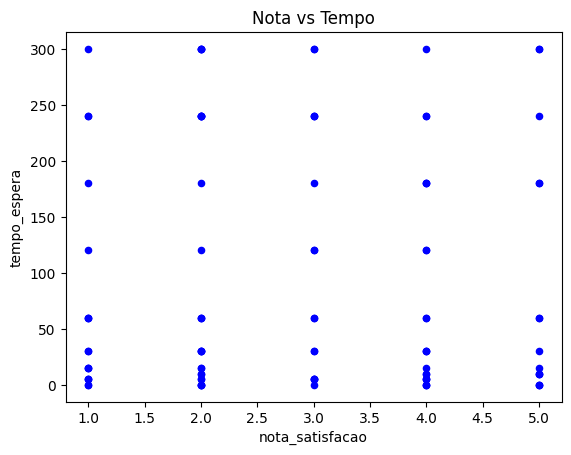

In [33]:
avaliacoes_analise.plot.scatter(x='nota_satisfacao', y='tempo_espera', color='blue', title='Nota vs Tempo')
plt.show()